In [1]:
import csv
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import numpy as np


In [2]:
class DataAnalysis:
    def __init__(self, label_path, pred_path):
        self.output_label = pd.read_csv(label_path)
        self.output_pred = pd.read_csv(pred_path)
        self.output_merged = self.preprocess_data()
    
    def preprocess_data(self):
        self.output_label = self.output_label.rename(columns={'Count': 'Count_Label'})
        self.output_pred = self.output_pred.rename(columns={'Count': 'Count_Pred'})
        
        self.output_label = self.output_label.sort_values(by='Position', ascending=True)
        self.output_pred = self.output_pred.sort_values(by='Position', ascending=True)
        
        output_merged = pd.merge(self.output_label, self.output_pred, on="Position")
        # Printing the Statistics of the Merged Data Frame
        print(output_merged.describe())    
        return output_merged

    def calculate_pearson_correlation(self, x_values, y_values, significance_level=0.05):
        corr_coef, p_value = stats.pearsonr(x_values, y_values)
        
        if p_value < significance_level:
            print("Statistically significant correlation between the two variables")
        else:
            print("No statistically significant correlation between the two variables")
        
        return corr_coef, p_value

    def plot_side_by_side_barchart(self, sub_df, index):
        fig, ax = plt.subplots(figsize=(10, 6))
        
        # Set positions for the bars
        bar_width = 0.4
        positions = range(len(sub_df))
        
        # Bars for Count_Label
        ax.barh([p - bar_width / 2 for p in positions], sub_df['Count_Label'], 
                color='blue', edgecolor='black', height=bar_width, label='True Mutation Count')
        
        # Bars for Count_Pred, positioned to the right
        ax.barh([p + bar_width / 2 for p in positions], sub_df['Count_Pred'], 
                color='orange', edgecolor='black', height=bar_width, label='Predicted Mutation Count')
        
        # Set y-ticks and labels
        ax.set_yticks(positions)
        ax.set_yticklabels(sub_df['Position'])
        
        # Add labels and legend
        ax.set_xlabel('Mutation Count')
        ax.set_ylabel('Position')
        ax.set_title(f'Mutation Count Comparison')
        ax.legend(loc='upper right')
        
        plt.tight_layout()
        plt.show()

    def plot_all_chunks(self, chunk_size=15):
        for i in range(0, len(self.output_merged), chunk_size):
            sub_df = self.output_merged.iloc[i:i+chunk_size]
            self.plot_side_by_side_barchart(sub_df, i//chunk_size)



         Position   Count_Label    Count_Pred
count  113.000000    113.000000    113.000000
mean   338.442478   7906.584071   7854.911504
std    174.688751  16531.049201  16578.435054
min      3.000000      9.000000      1.000000
25%    171.000000     51.000000      6.000000
50%    377.000000    128.000000     33.000000
75%    478.000000   5660.000000   5632.000000
max    668.000000  78578.000000  78593.000000
Statistically significant correlation between the two variables


Coorelation coefficient: 0.9999770205839178


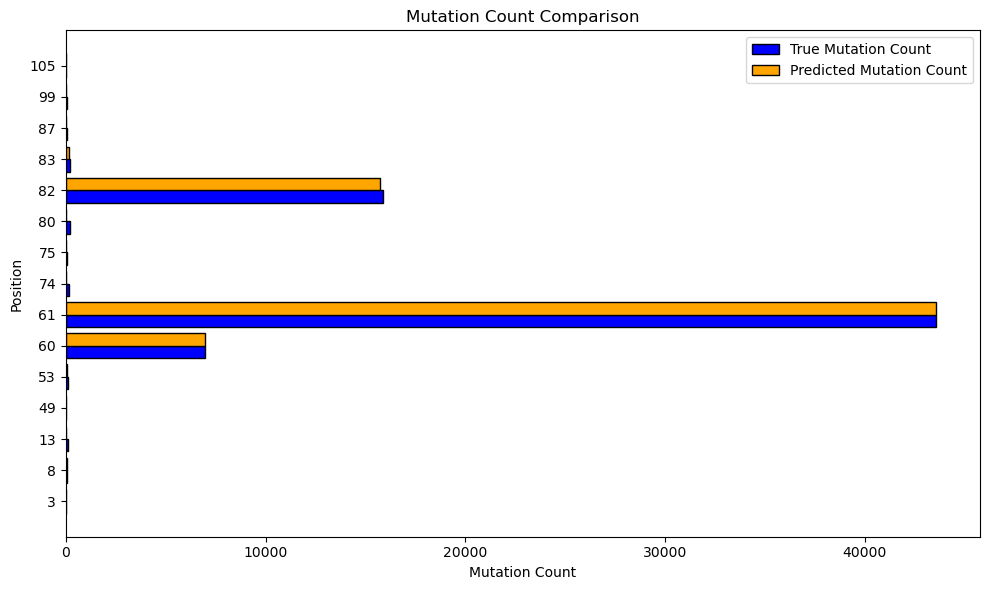

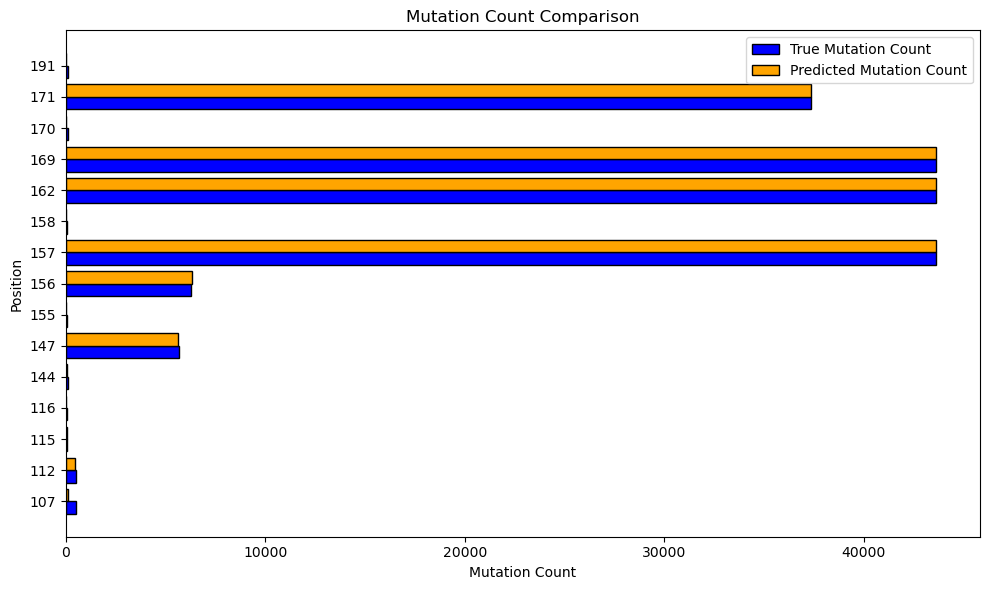

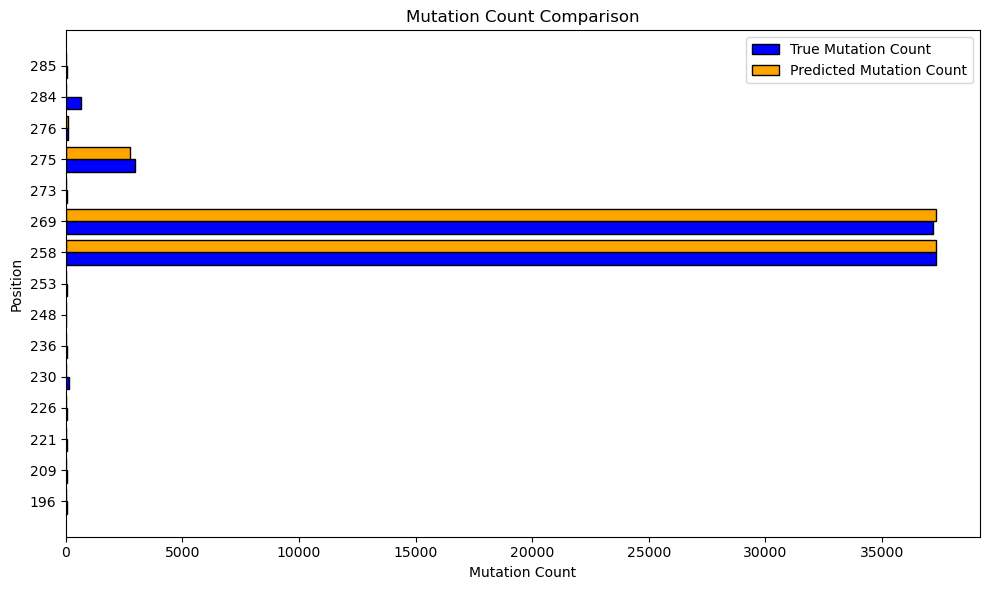

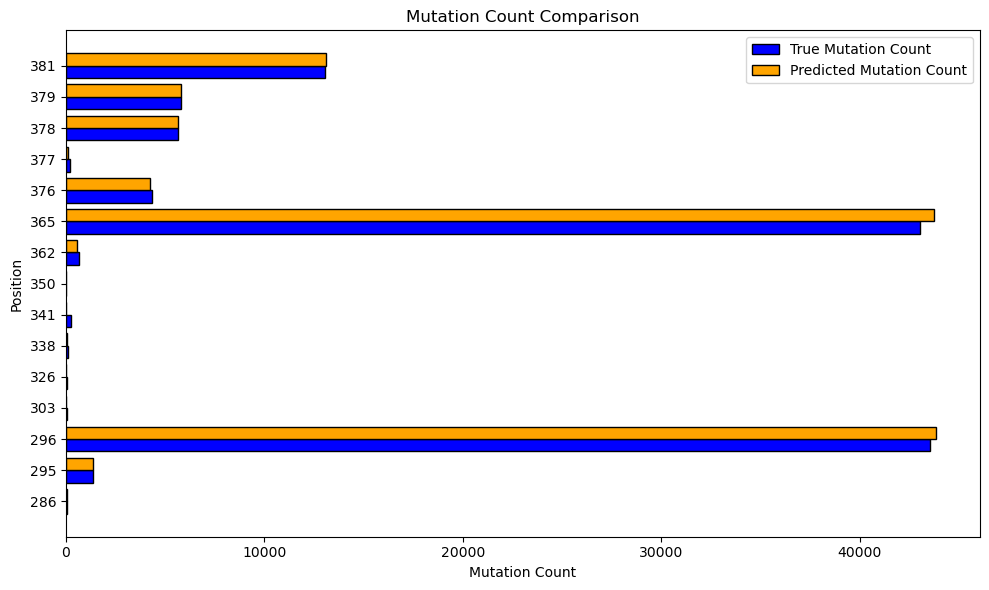

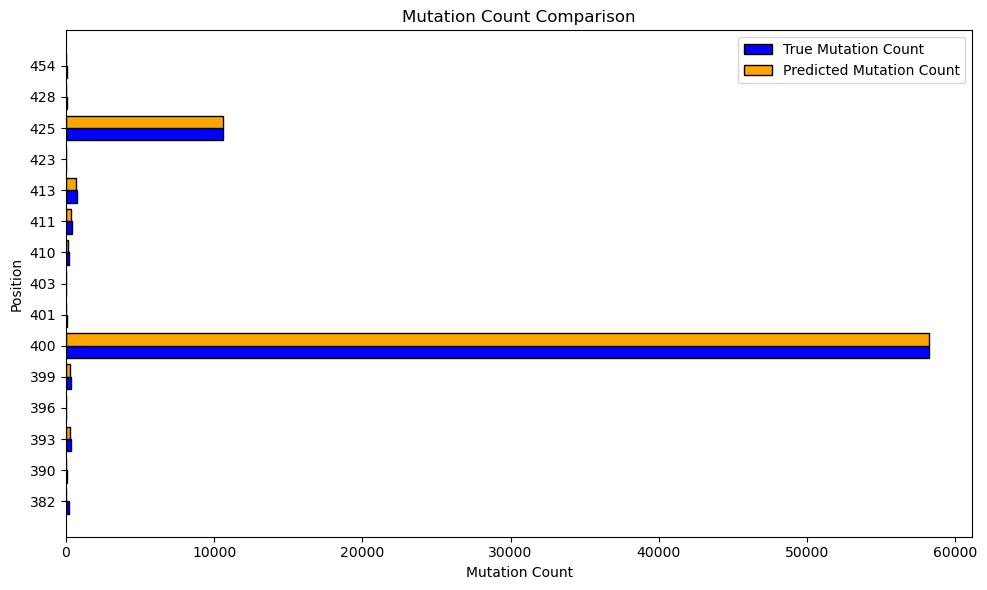

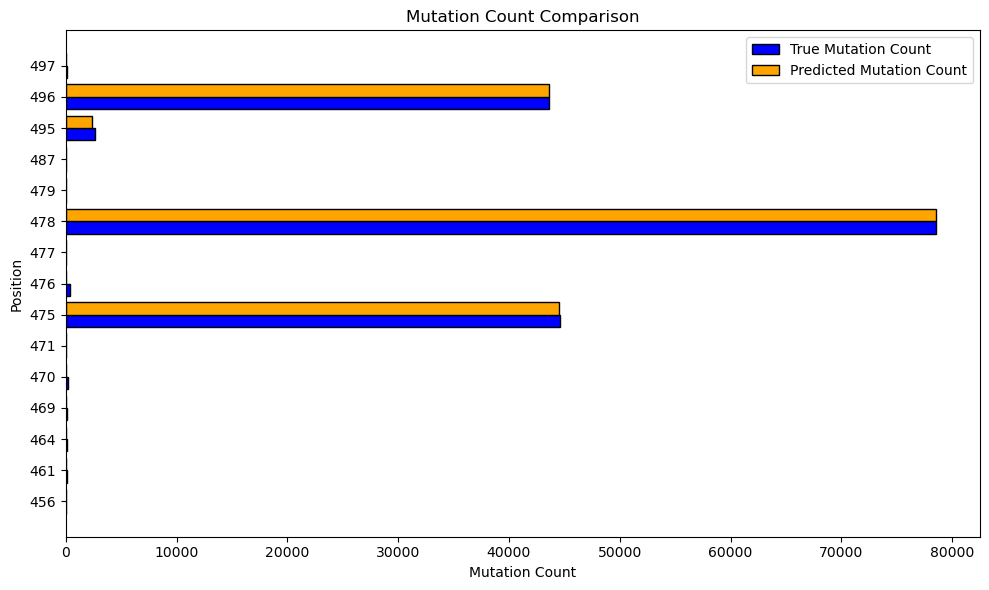

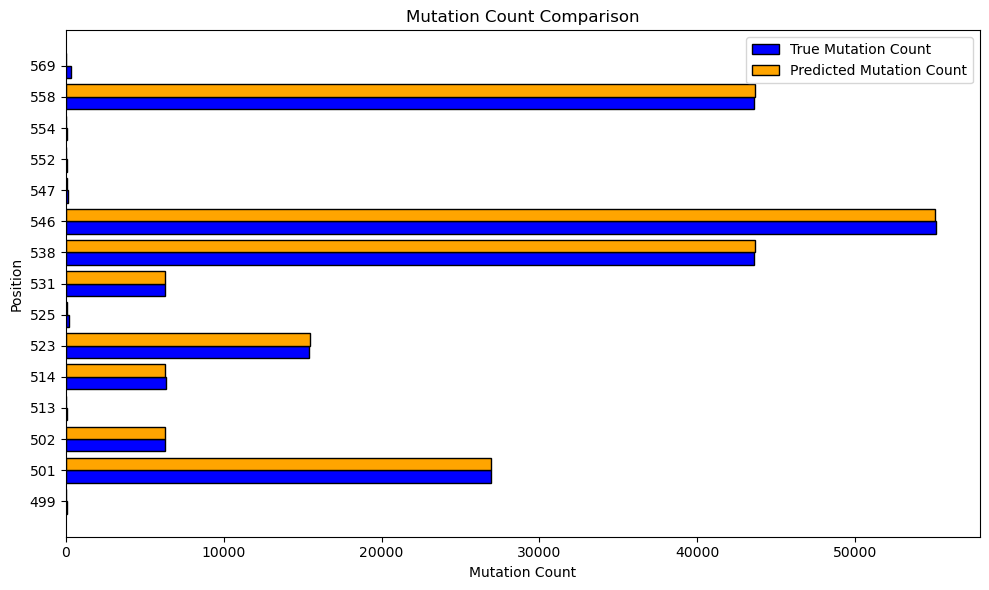

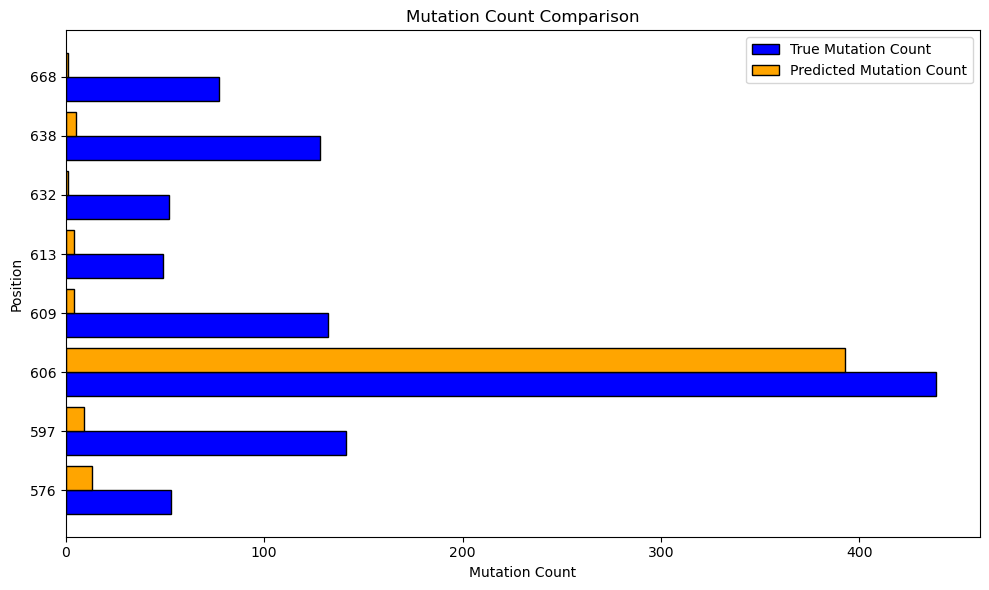

In [3]:
# Example usage
data_analysis = DataAnalysis("output_label.csv", "output_pred.csv")
corr_coef, p_value = data_analysis.calculate_pearson_correlation(data_analysis.output_merged['Count_Label'], data_analysis.output_merged['Count_Pred'])
print("\n\nCoorelation coefficient:",corr_coef)
data_analysis.plot_all_chunks()